# Data Preparation and Exploration

In [1]:
import pandas as pd
 
t_data = pd.read_csv('./globalterrorismdb_0718dist.tar.bz2', compression='bz2', low_memory=False)

In [2]:
t_data.sample(2)

Unnamed: 0       eventid  iyear  imonth  iday approxdate  extended  \
47232       47232  199107150003   1991       7    15        NaN         0   
52084       52084  199207080009   1992       7     8        NaN         0   

      resolution  country country_txt  ...  addnotes scite1 scite2 scite3  \
47232        NaN       37    Cameroon  ...       NaN    NaN    NaN    NaN   
52084        NaN       45    Colombia  ...       NaN    NaN    NaN    NaN   

       dbsource  INT_LOG  INT_IDEO  INT_MISC INT_ANY related  
47232      PGIS       -9        -9         0      -9     NaN  
52084      PGIS       -9        -9         0      -9     NaN  

[2 rows x 136 columns]

## Selected Columns

<font color="lightgreen">**Year and Date Information**:</font> 
|iyear|imonth|iday|
|---|---|---|

<font color="lightgreen">**Geographical Information**: </font>
|country_txt|region_txt|latitude|longitude|
|---|---|---|---|

<font color="lightgreen">**Details of the Attack**: </font>

|attacktype1_txt|targtype1_txt|targsubtype1_txt|target1|natlty1_txt|gname|
|---|---|---|---|---|---|

<font color="lightgreen">**Outcome and Casualties**: </font>
|success|suicide|nkill|nwound
|---|---|---|---|

---
### Check how terrorist activity trends have shifted worldwide, looking at the changes in the number of incidents over the years.

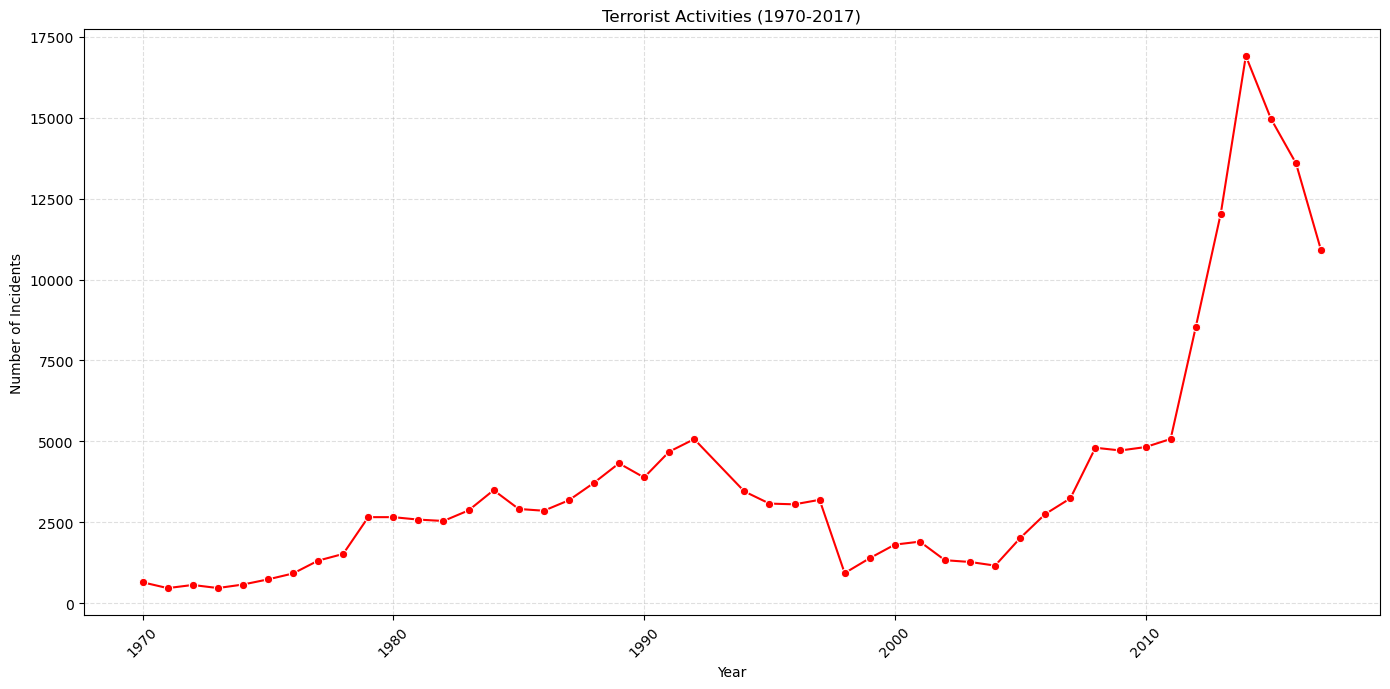

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_col = ['iyear', 'country_txt', 'region_txt', 'latitude', 'longitude',
                       'attacktype1_txt', 'targtype1_txt', 'target1', 'natlty1_txt', 'gname',
                       'success', 'suicide', 'nkill', 'nwound']

selected_df = t_data[selected_col]

# Analyze terrorism activities over the years
incident_by_year = selected_df.groupby('iyear').size()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=incident_by_year.index, y=incident_by_year.values,marker='o', color='red')
plt.title('Terrorist Activities (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From 1970 to 2017, the pattern of terrorist attacks changed a lot. At first, these incidents slowly went up from the 1970s, with a bigger jump in the early 2000s. After 2010, there was a big increase, hitting the highest point in 2014. Then, things started to calm down a bit by 2017.

___

#### Identify regions where the trend in terrorist activities significantly deviates from the global pattern.

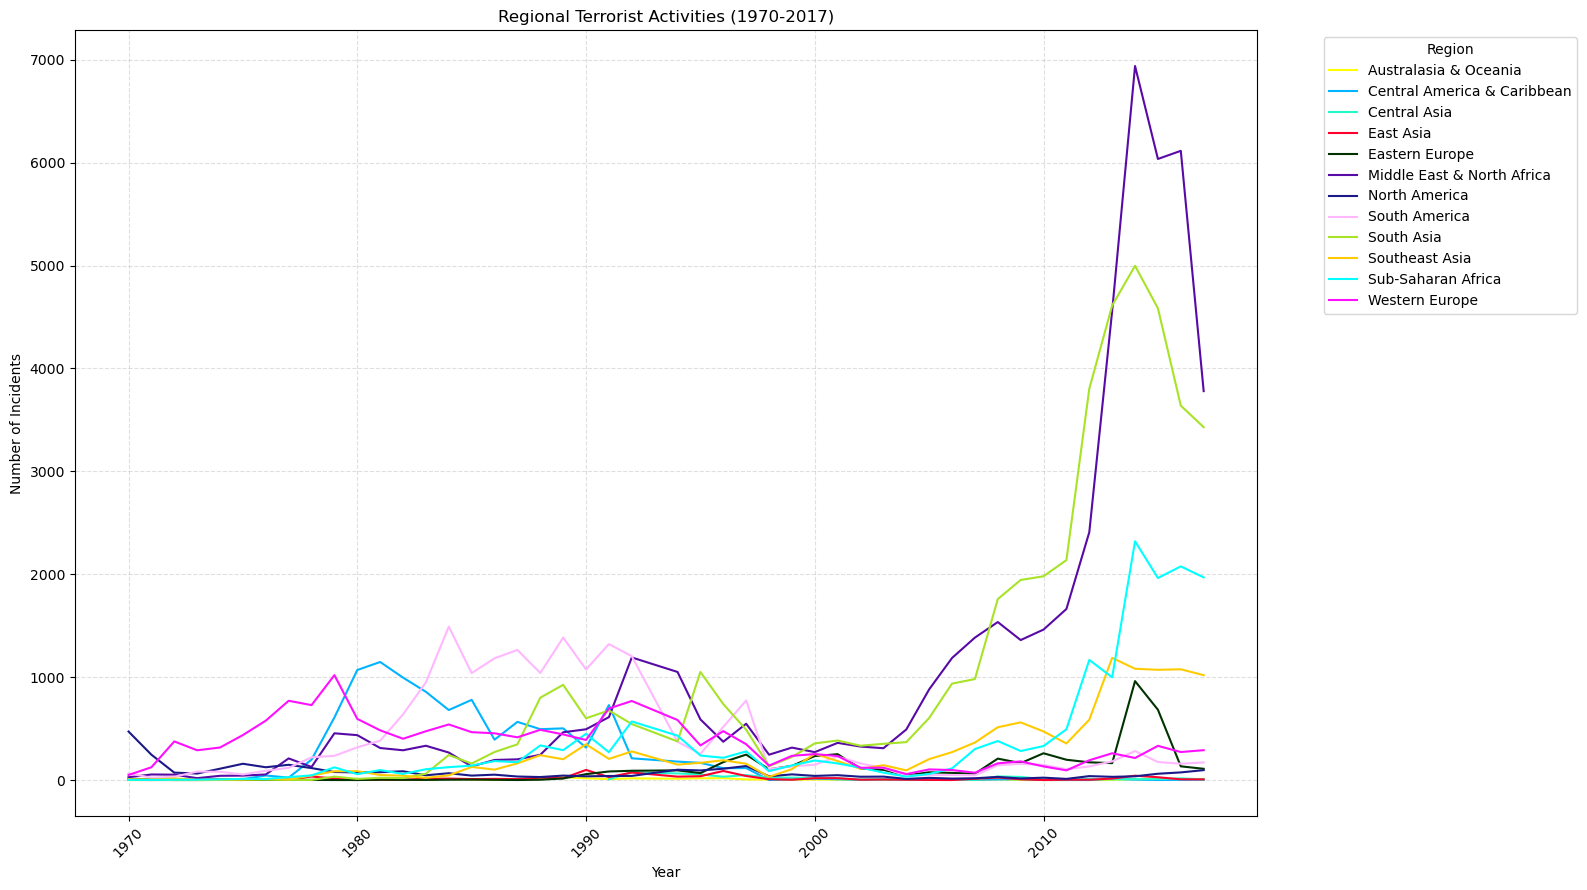

In [4]:
# Analyze regional trends 
regional = selected_df.groupby(['iyear', 'region_txt']).size().unstack()

# Plot regional trends
plt.figure(figsize=(16, 9))
sns.lineplot(data=regional, dashes=False, palette=[
    "#FFFF00", "#00B4FF", "#23FACB", "#FF002E",
    "#003300", "#570AA5","#1B1987", "#FFB8FF", "#A7E327",
    "#FFCB00", "#00FFFF", "#FF0FFF"
])
plt.title('Regional Terrorist Activities (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From 1970 to 2017, terrorist attack trends varied across different parts of the world:

- In some areas, especially after the early 2000s, there was a significant increase in attacks. This was noticeable in places like the **Middle East & North Africa**, and **South Asia**, mirroring the worldwide trend.

- Meanwhile, places like **Western Europe** and **North America** experienced ups and downs in the number of terrorist attacks. Still, they didn't see the same sharp rise as conflict-heavy regions.

- The peak of terrorist activities in 2014, in line with the global pattern, was particularly evident in the **Middle East & North Africa** and **South Asia** . This indicates these regions had a major role in the worldwide spike in terrorism during that time.

___

##### This analysis will explore the correlation between the number of incidents and the number of casualties, including those killed and wounded, to see if the frequency of attacks directly impacts their severity. Additionally, it will identify any outliers or irregularities in this relationship.

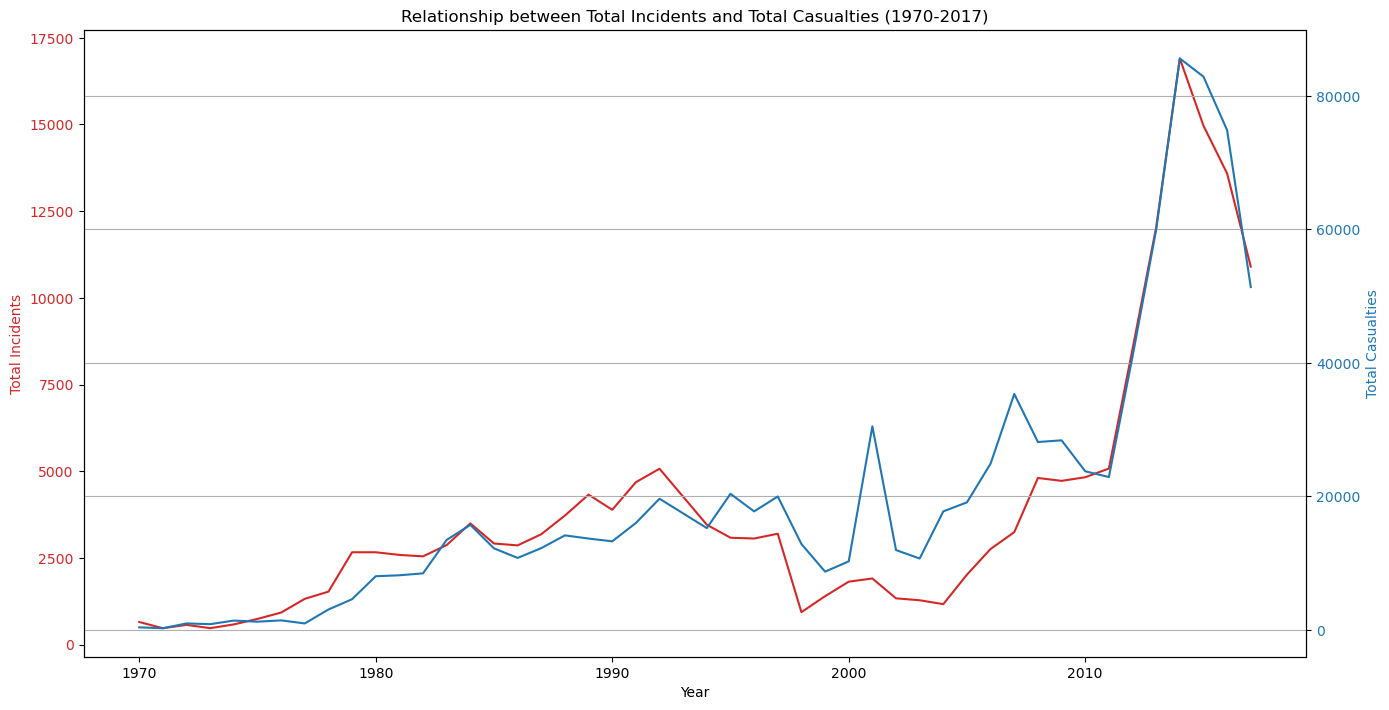

0.9487147520831848

In [5]:
correlation_df = selected_df.copy()

# Calculating total casualties (killed + wounded) for each incident
correlation_df['total_casualties'] = correlation_df['nkill'].fillna(0) + correlation_df['nwound'].fillna(0)

# Correlation between number of incidents and number of casualties
correlation_data = correlation_df.groupby('iyear').agg(
    total_incidents=pd.NamedAgg(column='iyear', aggfunc='count'),
    total_casualties=pd.NamedAgg(column='total_casualties', aggfunc='sum')
)

# Plotting the relationship between total incidents and total casualties over the years
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Incidents', color=color)
ax1.plot(correlation_data.index, correlation_data['total_incidents'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Casualties', color=color)
ax2.plot(correlation_data.index, correlation_data['total_casualties'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Relationship between Total Incidents and Total Casualties (1970-2017)')
plt.grid(True)
plt.show()

# Calculating the correlation coefficient
correlation_coefficient = correlation_data['total_incidents'].corr(correlation_data['total_casualties'])
correlation_coefficient


In [6]:
attack_counts = selected_df['attacktype1_txt'].fillna(0).value_counts()

print(f"There are {len(attack_counts)} different kinds of attacks in the attacktype1_txt column:")

attack_counts

There are 9 different kinds of attacks in the attacktype1_txt column:


attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

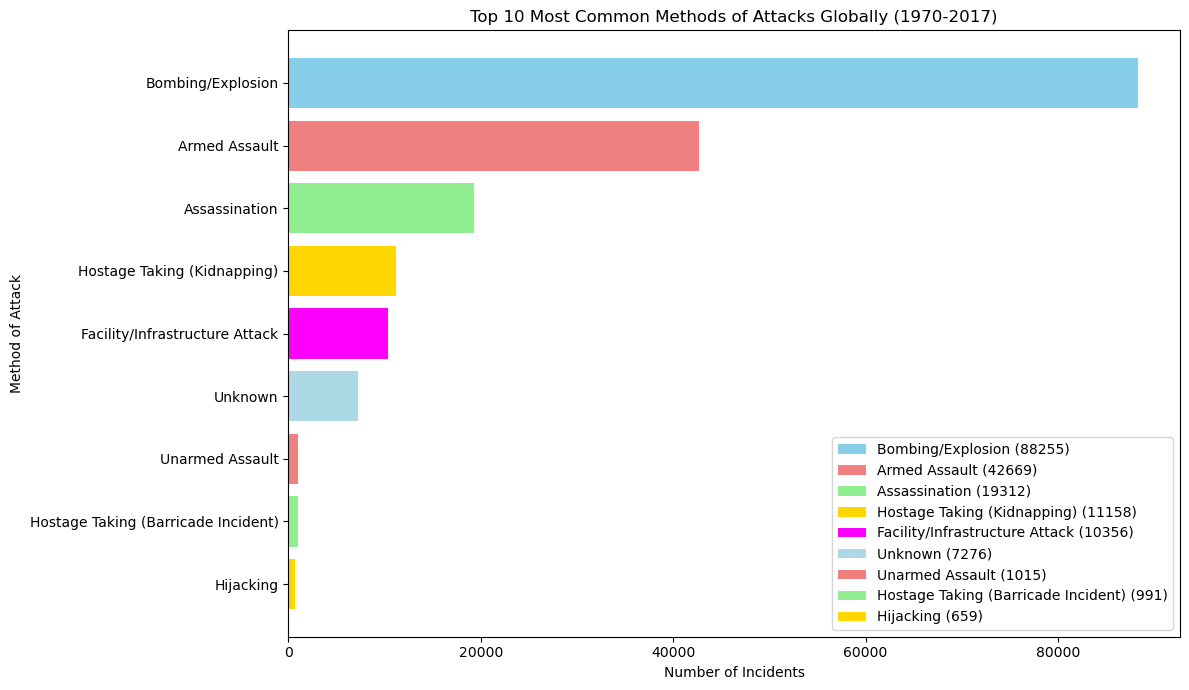

attacktype1_txt              Armed Assault  Assassination  Bombing/Explosion  \
region_txt                                                                     
Australasia & Oceania                   51             36                 75   
Central America & Caribbean           4361           1254               3239   
Central Asia                           116            115                235   
East Asia                              117             55                330   
Eastern Europe                        1274            400               2766   
Middle East & North Africa            9273           4206              30908   
North America                          448            255               1534   
South America                         3875           2745               9039   
South Asia                           11404           4301              21246   
Southeast Asia                        4022           1369               4818   
Sub-Saharan Africa                    6004           1638               5557   
Western Europe                        1724           2938               8508   

attacktype1_txt              Facility/Infrastructure Attack  Hijacking  \
region_txt                                                               
Australasia & Oceania                                    71          3   
Central America & Caribbean                             403         26   
Central Asia                                             20          8   
East Asia                                               200         18   
Eastern Europe                                          260         26   
Middle East & North Africa                             1115        138   
North America                                           906         18   
South America                                           803         67   
South Asia                                             2189         93   
Southeast Asia                                          948         59   
Sub-Saharan Africa                                      810        136   
Western Europe                                         2631         67   

attacktype1_txt              Hostage Taking (Barricade Incident)  \
region_txt                                                         
Australasia & Oceania                                          6   
Central America & Caribbean                                  187   
Central Asia                                                   2   
East Asia                                                      3   
Eastern Europe                                                21   
Middle East & North Africa                                   100   
North America                                                 67   
South America                                                234   
South Asia                                                   120   
Southeast Asia                                                67   
Sub-Saharan Africa                                            95   
Western Europe                                                89   

attacktype1_txt              Hostage Taking (Kidnapping)  Unarmed Assault  \
region_txt                                                                  
Australasia & Oceania                                 13               11   
Central America & Caribbean                          501               19   
Central Asia                                          45                5   
East Asia                                             14               42   
Eastern Europe                                       220               62   
Middle East & North Africa                          2666              177   
North America                                        123               73   
South America                                       1414               47   
South Asia                                          3277              323   
Southeast Asia                            

In [7]:
# Analyze the most common methods of attacks by region
attack_methods_by_region = selected_df.groupby('region_txt')['attacktype1_txt'].value_counts().groupby(level=0).head(10).unstack(level=-1)

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'magenta', 'lightblue', 'lightcoral', 'lightgreen', 'gold', 'magenta']

plt.figure(figsize=(12, 7))
for i, (method, count) in enumerate(attack_counts.items()):
    plt.barh(method, count, color=colors[i], label=f"{method} ({count})")

plt.title('Top 10 Most Common Methods of Attacks Globally (1970-2017)')
plt.xlabel('Number of Incidents')
plt.ylabel('Method of Attack')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.legend()
plt.tight_layout()
plt.show()

# Attack methods by region
attack_methods_by_region=attack_methods_by_region.fillna(0).astype(int)

attack_methods_by_region


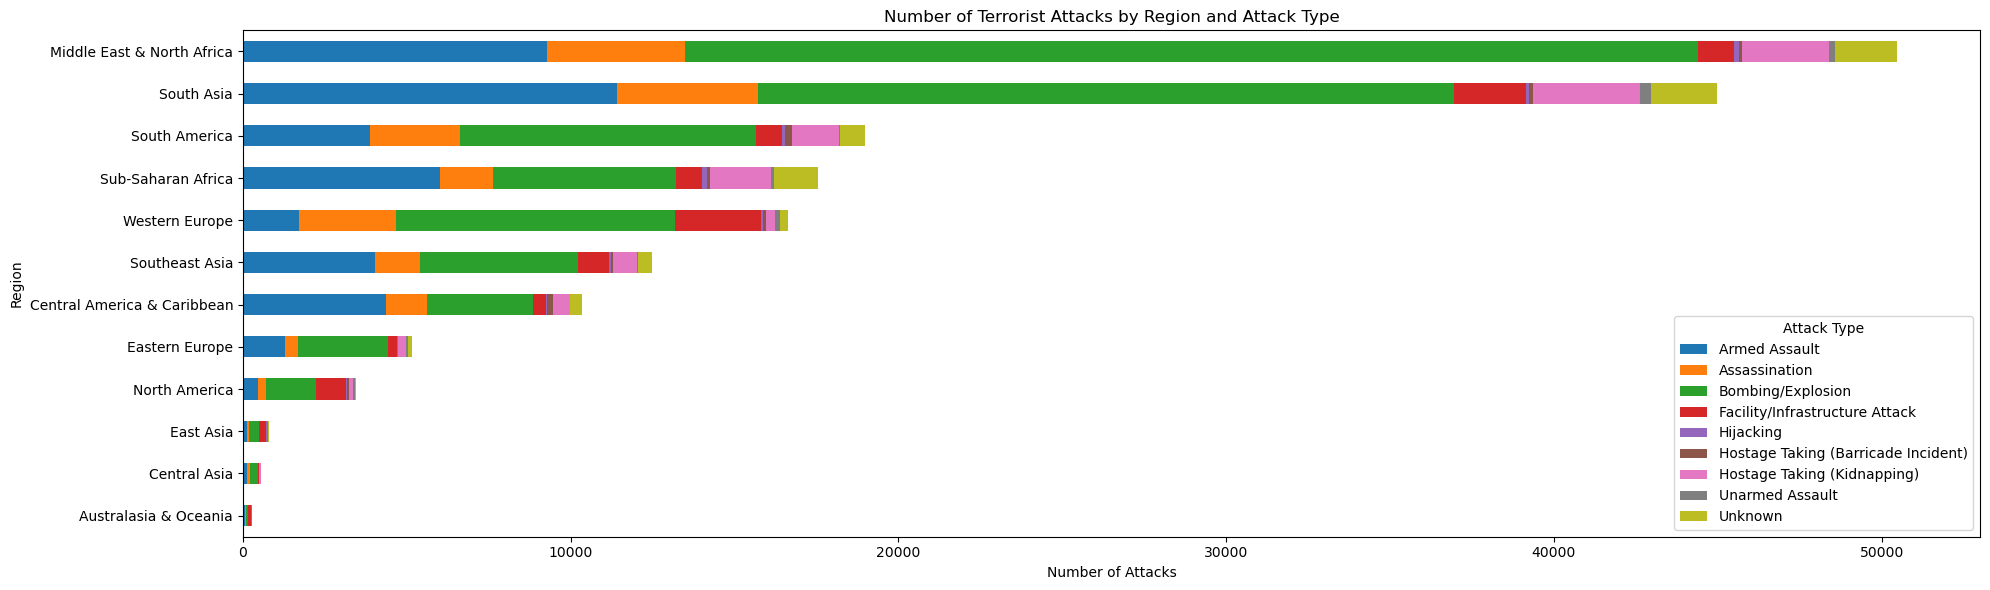

In [9]:
attack_methods_by_region['Total'] = attack_methods_by_region.sum(axis=1)
attack_methods_by_region_sorted = attack_methods_by_region.sort_values('Total', ascending=True).drop('Total', axis=1)

attack_methods_by_region_sorted.plot(kind='barh', stacked=True, figsize=(20, 6))
plt.title('Number of Terrorist Attacks by Region and Attack Type')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.legend(title='Attack Type')
plt.tight_layout()  
plt.show()


#### Geographical distribution of terrorist incidents

In [10]:
import folium
from folium.plugins import FastMarkerCluster

# Creating a base map
map = folium.Map(location=[20, 0], zoom_start=2)

# Adding points using FastMarkerCluster to handle a large number of points
FastMarkerCluster(data=list(zip(selected_df['latitude'].dropna(), selected_df['longitude'].dropna()))).add_to(map)

# Displaying the map
map.save('./terrorist_incidents_map2.html')

In [11]:
map

This map offers a visual representation of how terrorist incidents are spread across different regions, according to the dataset. Exploring the map reveals where terrorist activities are most concentrated around the world, pointing out regions with higher incident rates.

___

The analysis leads to several key findings:

- There have been ups and downs in terrorist activities over time, with a significant rise in global incidents starting in the early 2000s and reaching a high point in 2014.

- Different regions have seen varying changes in terrorist activities, with notable increases especially in the **Middle East & North Africa** and **South Asia**.

- A **strong positive correlation** exists between the number of incidents and casualties, showing that years with more incidents also tend to have more casualties.

- **Bombing/Explosion** and **Armed Assault** are the top methods used in attacks worldwide, though specific regions show different preferences in tactics.

- The distribution of terrorist incidents highlights areas of concentration, which matches the trends identified through data analysis.